### Exercise on upstream scheme

- Write a Fortran program to integrate the linear advection equation
\begin{equation}
    \frac{\partial \phi}{\partial t} + u \frac{\partial \phi}{\partial x} = 0
\end{equation}
using an upwind scheme in the domain $0 \leq x \leq 1000\,m$ with advection velocity $u = 0.42\,m\,s^{-1}$. Let $\Delta x = 0.25\,m$ and assume periodic boundary conditions. Assume the initial shape to be:
$$ \phi(x, 0)=  \left\{
\begin{array}{ll}
      0.0 \quad \mathrm{for} \quad x<400 \\
      \sin^2\left(\pi\,\frac{x-400}{200}\right) \quad \mathrm{for} \quad 400 \leq x < 600 \\
      0.0 \quad \mathrm{for} \quad x > 600 \\
\end{array} 
\right. $$ 

- Integrate forward and show solutions from $t=0\,s$ to $t = 2000\,s$ every $500\,s$ and explain the characteristics of the solution. What happens if $\Delta t = \frac{\Delta x}{u}, (c == 1)$

**Hint: Select $\Delta t$ to have a stable scheme remembering the CFL condition.**

What happens if $\Delta t = \frac{\Delta x}{u}, (c == 1)$?

- As we can see in the plot below, if $c == 1$, the solution to the advection is not decaying. 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [12]:
x0 = 0.0
x1 = 1000.0
t0 = 0.0
t1 = 2000.0
u = 0.42
dx = 0.25
dt = 0.15
tp = 500.0

c = u * dt / dx
nx = round((x1 - x0) / dx) + 1
x = np.linspace(x0, x1, nx)

In [13]:
def phi0(x):
    if x < 400.0:
        return 0.0
    elif 400.0 <= x < 600.0:
        return np.sin(np.pi * (x - 400.0) / 200.0)**2
    else:
        return 0.0

def ftfs(phi_n):
    return (1 + c) * phi_n - c * np.roll(phi_n, -1)

def ftbs(phi_n):
    return (1 - c) * phi_n + c * np.roll(phi_n, 1)

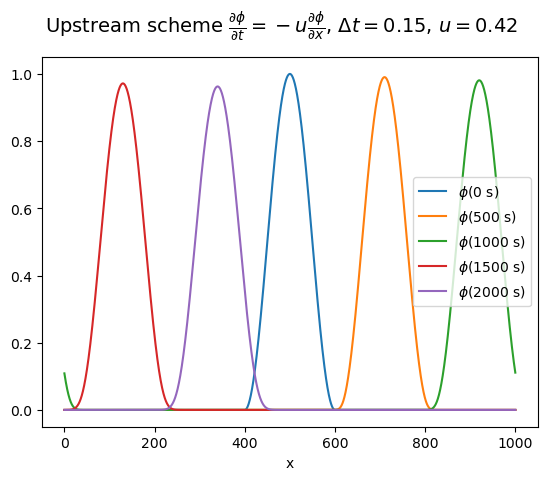

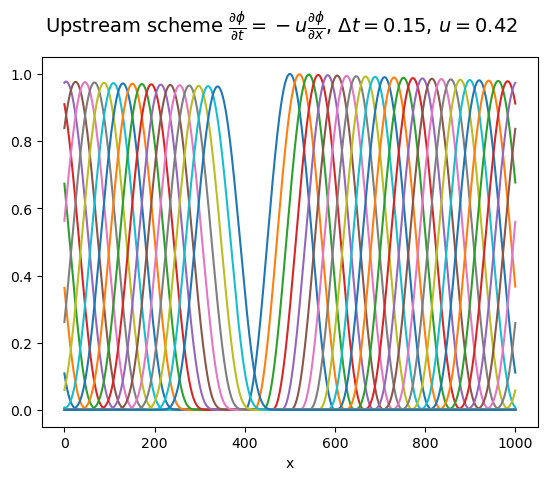

In [14]:
phi = np.array([phi0(xi) for xi in x])

c = u * dt / dx
nx = round((x1 - x0) / dx) + 1
x = np.linspace(x0, x1, nx)

phi = np.array([phi0(xi) for xi in x])

t = t0
while t < t1:
    if u > 0:
        phi_new = ftbs(phi)
    else:
        phi_new = ftfs(phi)
    
    phi[:] = phi_new
    t += dt
    
    if np.mod(t, tp) <= dt:
        plt.plot(x, phi, label=f'$\phi$({int(t)} s)')
plt.xlabel('x')
plt.suptitle(r'Upstream scheme $\frac{\partial \phi}{\partial t} = -u \frac{\partial \phi}{\partial x}$, $\Delta t = 0.15$, $u = 0.42$', fontsize=14)
plt.legend()
#plt.savefig('advection_plot.png') 
plt.show()

phi = np.array([phi0(xi) for xi in x])

c = u * dt / dx
nx = round((x1 - x0) / dx) + 1
x = np.linspace(x0, x1, nx)

phi = np.array([phi0(xi) for xi in x])

t = t0

while t < t1:
    if u > 0:
        phi_new = ftbs(phi)
    else:
        phi_new = ftfs(phi)
    
    phi[:] = phi_new
    t += dt
    
    if np.mod(t, 50) <= dt:
        plt.plot(x, phi, label=f'$\phi$({int(t)} s)')
plt.xlabel('x')
plt.suptitle(r'Upstream scheme $\frac{\partial \phi}{\partial t} = -u \frac{\partial \phi}{\partial x}$, $\Delta t = 0.15$, $u = 0.42$', fontsize=14)
#plt.savefig('advection_plot.png') 
plt.show()

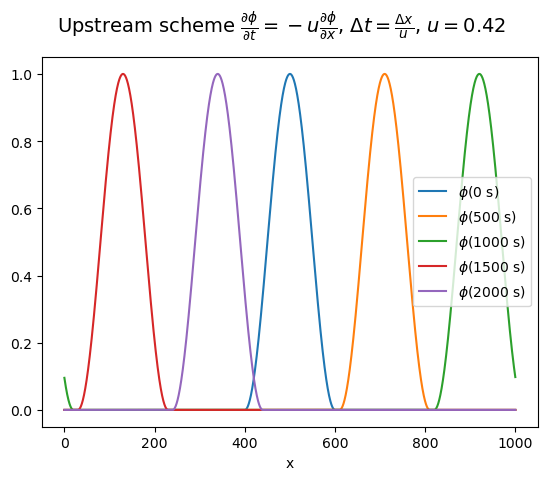

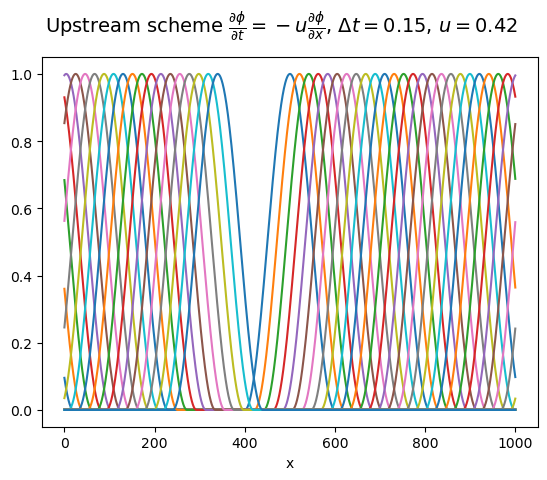

In [15]:
dt = dx/u

phi = np.array([phi0(xi) for xi in x])

c = u * dt / dx
nx = round((x1 - x0) / dx) + 1
x = np.linspace(x0, x1, nx)

phi = np.array([phi0(xi) for xi in x])

t = t0
while t < t1:
    if u > 0:
        phi_new = ftbs(phi)
    else:
        phi_new = ftfs(phi)
    
    phi[:] = phi_new
    t += dt
    
    if np.mod(t, tp) <= dt:
        plt.plot(x, phi, label=f'$\phi$({int(t)} s)')
plt.xlabel('x')
plt.suptitle(r'Upstream scheme $\frac{\partial \phi}{\partial t} = -u \frac{\partial \phi}{\partial x}$, $\Delta t = \frac{\Delta x}{u}$, $u = 0.42$', fontsize=14)
plt.legend()
#plt.savefig('advection_plot_c=1.png') 
plt.show()

phi = np.array([phi0(xi) for xi in x])

c = u * dt / dx
nx = round((x1 - x0) / dx) + 1
x = np.linspace(x0, x1, nx)

phi = np.array([phi0(xi) for xi in x])

t = t0

while t < t1:
    if u > 0:
        phi_new = ftbs(phi)
    else:
        phi_new = ftfs(phi)
    
    phi[:] = phi_new
    t += dt
    
    if np.mod(t, 50) <= dt:
        plt.plot(x, phi, label=f'$\phi$({int(t)} s)')
plt.xlabel('x')
plt.suptitle(r'Upstream scheme $\frac{\partial \phi}{\partial t} = -u \frac{\partial \phi}{\partial x}$, $\Delta t = 0.15$, $u = 0.42$', fontsize=14)
#plt.savefig('advection_plot.png') 
plt.show()

#### Turn this into CODE if want to save the animation (The simulation is very slow, I will devising the code to make it faster)

dt = dx/u

phi = np.array([phi0(xi) for xi in x])

c = u * dt / dx
nx = round((x1 - x0) / dx) + 1
x = np.linspace(x0, x1, nx)

phi = np.array([phi0(xi) for xi in x])

t = t0

fig, ax = plt.subplots()
line, = ax.plot(x, phi)

def animate(t):
    global phi
    if u > 0:
        phi_new = ftbs(phi)
    else:
        phi_new = ftfs(phi)

    phi[:] = phi_new
    line.set_ydata(phi)
    return line,

ani = animation.FuncAnimation(
    fig, animate, frames=int(t1 / dt), interval= 1, blit=True, repeat=False
)

ani.save('advectionc1.gif', writer='pillow')
